## Read and Plot the metrics from the testing of the CNN

### CNN ran with spatial component added, with the spectra binned into various channels/bin values & the metrics saved in ./metrics/ directory as .txt files

---

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# setup array with the total number of channels (each bin contains 848/#channels)

channels = np.array([848, 424, 283, 212, 170, 142, 122, 106, 85, 53, 22])

In [3]:
testimage = ['108', '000', 'north']

In [4]:
accuracy = {'108':[], '000':[], 'north':[]}
avg_prec = {'108':[], '000':[], 'north':[]}
avg_recall = {'108':[], '000':[], 'north':[]}
veg_prec = {'108':[], '000':[], 'north':[]}
veg_recall = {'108':[], '000':[], 'north':[]}

In [5]:
# loop through files reading:
# accuracy, avg precision and recall, and vegetation precision and recall

for testim in testimage:
    for channel in channels:
        filename = "./metrics/CNN_spatial_train_108_test_" + testim + \
                    "_binned_" + str(channel) + "_metrics.txt"
        f = open(filename, "r")
        f1 = f.readlines()

        # read accuracy from 13th line
        accuracy[testim].append(float(f1[12]))

        # read avg_prec and avg_recall from 28th line
        Nums = []
        for num in f1[27].split():
            try:
                Nums.append(float(num))
            except ValueError:
                pass
        avg_prec[testim].append(Nums[0])
        avg_recall[testim].append(Nums[1])        
        
        # read veg_prec and veg_recall from 20th line
        Nums = []
        for num in f1[19].split():
            try:
                Nums.append(float(num))
            except ValueError:
                pass
        veg_prec[testim].append(Nums[0])
        veg_recall[testim].append(Nums[1])  
        f.close()

In [6]:
print(accuracy)

{'108': [0.93625, 0.92375, 0.916875, 0.9315625, 0.915625, 0.9321875, 0.92625, 0.9196875, 0.9175, 0.895625, 0.923125], '000': [0.5500562429696289, 0.547806524184477, 0.5444319460067492, 0.5601799775028121, 0.546962879640045, 0.5489313835770528, 0.5551181102362205, 0.5596175478065242, 0.5565241844769404, 0.5213723284589427, 0.562429696287964], 'north': [0.3759829968119022, 0.3851222104144527, 0.4529224229543039, 0.4493092454835282, 0.50201912858661, 0.48905419766206165, 0.4873538788522848, 0.4875664187035069, 0.46057385759829966, 0.45419766206163653, 0.4733262486716259]}


In [7]:
print(avg_prec)

{'108': [0.93, 0.93, 0.92, 0.92, 0.9, 0.92, 0.92, 0.91, 0.91, 0.9, 0.92], '000': [0.69, 0.68, 0.65, 0.68, 0.65, 0.55, 0.68, 0.68, 0.67, 0.5, 0.65], 'north': [0.27, 0.31, 0.37, 0.29, 0.35, 0.38, 0.39, 0.37, 0.34, 0.25, 0.28]}


In [8]:
print(avg_recall)

{'108': [0.94, 0.92, 0.92, 0.93, 0.92, 0.93, 0.93, 0.92, 0.92, 0.9, 0.92], '000': [0.55, 0.55, 0.54, 0.56, 0.55, 0.55, 0.56, 0.56, 0.56, 0.52, 0.56], 'north': [0.38, 0.39, 0.45, 0.45, 0.5, 0.49, 0.49, 0.49, 0.46, 0.45, 0.47]}


In [10]:
print(veg_prec)

{'108': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], '000': [0.96, 0.95, 0.96, 0.94, 0.96, 0.97, 0.95, 0.96, 0.96, 0.98, 0.99], 'north': [0.85, 0.81, 0.98, 0.67, 0.91, 0.95, 0.94, 0.94, 0.74, 0.76, 0.96]}


In [11]:
print(veg_recall)

{'108': [0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99], '000': [0.92, 0.94, 0.98, 0.95, 0.95, 0.94, 0.95, 0.93, 0.96, 0.92, 0.91], 'north': [1.0, 0.99, 0.86, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}


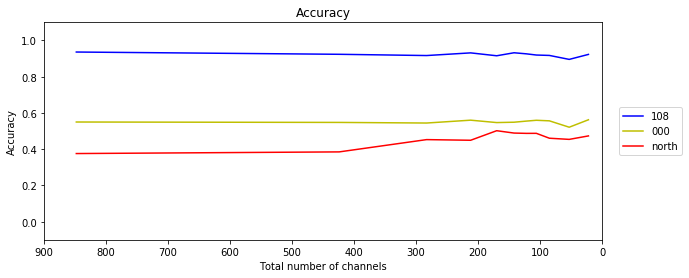

In [64]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(channels, accuracy['108'], color='b', label='108')
ax.plot(channels, accuracy['000'], color='y', label='000')
ax.plot(channels, accuracy['north'], color='r', label='north')
ax.set(title="Accuracy")
ax.set_xlim(900,0)
ax.set_ylim(-0.1,1.1)
ax.set_xlabel("Total number of channels")
ax.set_ylabel("Accuracy")
ax.legend(loc="center right", borderaxespad=-8.0)
plt.show()

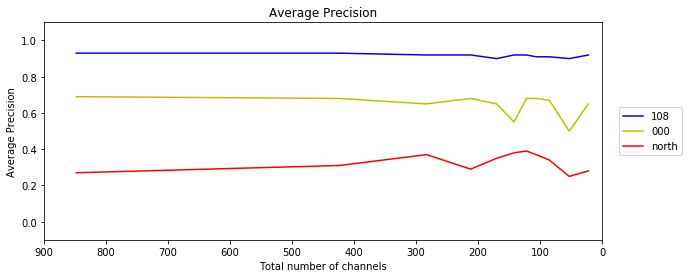

In [65]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(channels, avg_prec['108'], color='b', label='108')
ax.plot(channels, avg_prec['000'], color='y', label='000')
ax.plot(channels, avg_prec['north'], color='r', label='north')
ax.set(title="Average Precision")
ax.set_xlim(900,0)
ax.set_ylim(-0.1,1.1)
ax.set_xlabel("Total number of channels")
ax.set_ylabel("Average Precision")
ax.legend(loc="center right", borderaxespad=-8.0)
plt.show()

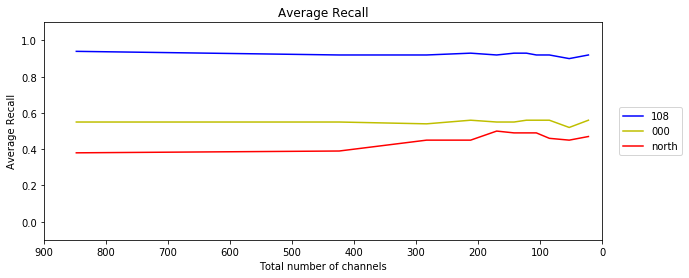

In [66]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(channels, avg_recall['108'], color='b', label='108')
ax.plot(channels, avg_recall['000'], color='y', label='000')
ax.plot(channels, avg_recall['north'], color='r', label='north')
ax.set(title="Average Recall")
ax.set_xlim(900,0)
ax.set_ylim(-0.1,1.1)
ax.set_xlabel("Total number of channels")
ax.set_ylabel("Average Recall")
ax.legend(loc="center right", borderaxespad=-8.0)
plt.show()

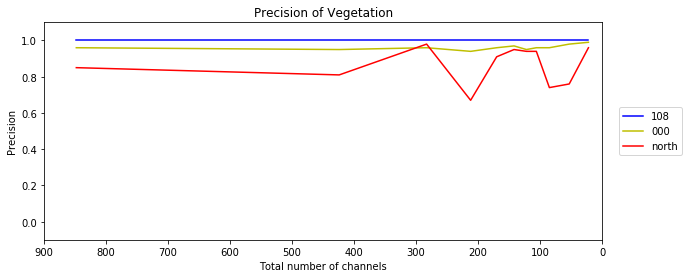

In [67]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(channels, veg_prec['108'], color='b', label='108')
ax.plot(channels, veg_prec['000'], color='y', label='000')
ax.plot(channels, veg_prec['north'], color='r', label='north')
ax.set(title="Precision of Vegetation")
ax.set_xlim(900,0)
ax.set_ylim(-0.1,1.1)
ax.set_xlabel("Total number of channels")
ax.set_ylabel("Precision")
ax.legend(loc="center right", borderaxespad=-8.0)
plt.show()

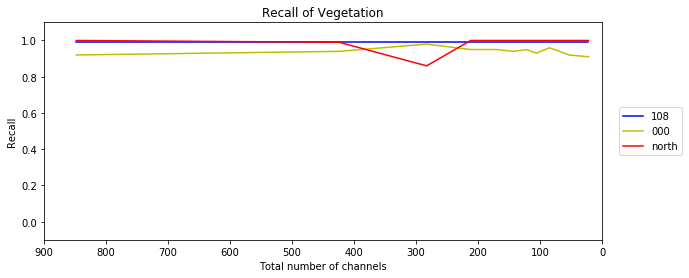

In [68]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(channels, veg_recall['108'], color='b', label='108')
ax.plot(channels, veg_recall['000'], color='y', label='000')
ax.plot(channels, veg_recall['north'], color='r', label='north')
ax.set(title="Recall of Vegetation")
ax.set_xlim(900,0)
ax.set_ylim(-0.1,1.1)
ax.set_xlabel("Total number of channels")
ax.set_ylabel("Recall")
ax.legend(loc="center right", borderaxespad=-8.0)
plt.show()